<a href="https://colab.research.google.com/github/AlexKressner/Vorlesung-Business-Intelligence-Anwendungen/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [29]:
pd.options.display.float_format = "{:.4f}".format
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

In [30]:
# Google-Drive einbinden
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
path = "/content/drive/MyDrive/DHBW/BI/Daten/Bosch/"

# Load and join data

In [32]:
dtypes = {
    "TimeSeriesId": "str",
    "Quantity" : "int"
}

In [33]:
sales = pd.read_csv(path + "DHBW_Bosch_PT_Sales.csv", parse_dates=["Date"], dtype=dtypes)

In [34]:
dtypes = {
    "TimeSeriesId": "str",
    "Product_Hierachy1": "str",
    "Product_Hierachy2": "str",
    "Product_Hierachy3": "str",
}

In [35]:
master_data = pd.read_csv(path + "DHBW_Bosch_PT_MasterData.csv", dtype=dtypes, parse_dates=["First_Goods_Issue_Date","Effective_Out_Date"])

In [36]:
data = pd.merge(sales, master_data, how="left",on="TimeSeriesId", validate="m:1")

In [37]:
data.dtypes

TimeSeriesId                      object
Date                      datetime64[ns]
Quantity                           int64
Region                            object
Product_Hierachy1                 object
Product_Hierachy2                 object
Product_Hierachy3                 object
ABC_Classification                object
XYZ_Predictability                object
Price_Normalized                 float64
First_Goods_Issue_Date    datetime64[ns]
Effective_Out_Date        datetime64[ns]
dtype: object

In [38]:
data.shape

(1257177, 12)

In [39]:
data.sort_values(by=["TimeSeriesId","Date"],inplace=True)

In [40]:
data.head()

,TimeSeriesId,Date,Quantity,Region,Product_Hierachy1,Product_Hierachy2,Product_Hierachy3,ABC_Classification,XYZ_Predictability,Price_Normalized,First_Goods_Issue_Date,Effective_Out_Date
0,1,2021-11-30,10,C,72,10,18,B,Z,0.0333,2021-11-29,2030-12-31
1,1,2022-01-07,1,C,72,10,18,B,Z,0.0333,2021-11-29,2030-12-31
2,1,2022-01-12,151,C,72,10,18,B,Z,0.0333,2021-11-29,2030-12-31
3,1,2022-01-26,1,C,72,10,18,B,Z,0.0333,2021-11-29,2030-12-31
4,1,2022-01-31,3,C,72,10,18,B,Z,0.0333,2021-11-29,2030-12-31


# Data Exploration

### dates

In [41]:
data.Date.min(), data.Date.max()

(Timestamp('2018-04-02 00:00:00'), Timestamp('2022-08-31 00:00:00'))

### regions

In [42]:
master_data.Region.value_counts().sort_values()

U     464
C     981
M    1123
S    1284
I    1344
N    1442
Name: Region, dtype: int64

### hierarchies

In [43]:
# top level
master_data.Product_Hierachy1.value_counts().sort_values()

82    1654
73    2207
72    2777
Name: Product_Hierachy1, dtype: int64

In [44]:
# mid level
master_data.Product_Hierachy2.nunique()

24

In [45]:
# low level
master_data.Product_Hierachy3.nunique()

84

In [46]:
# time series level
master_data.TimeSeriesId.nunique()

6638

In [47]:
links = master_data[["Product_Hierachy1","Product_Hierachy2","Product_Hierachy3","TimeSeriesId"]]
links.groupby(["Product_Hierachy1","Product_Hierachy2","Product_Hierachy3"]).count().reset_index().sort_values("TimeSeriesId", ascending=False)

,Product_Hierachy1,Product_Hierachy2,Product_Hierachy3,TimeSeriesId
83,82,41,256,540
69,73,58,796,326
3,72,10,18,266
50,73,53,81,257
2,72,10,17,251
62,73,57,109,234
79,82,40,259,216
85,82,41,258,205
29,72,85,326,193
54,73,56,90,176


### XYZ-Predictability

In [48]:
master_data.XYZ_Predictability.value_counts()

Z          5502
X           805
N           177
Y           108
Unknown      46
Name: XYZ_Predictability, dtype: int64

### Phase-in and phase-out

In [49]:
data["Year_quarter_phase_in"] = data.First_Goods_Issue_Date.dt.to_period("Q")
data["Year_month_phase_out"] = data.Effective_Out_Date.dt.to_period("M").astype("str")

In [50]:
data.head()

,TimeSeriesId,Date,Quantity,Region,Product_Hierachy1,Product_Hierachy2,Product_Hierachy3,ABC_Classification,XYZ_Predictability,Price_Normalized,First_Goods_Issue_Date,Effective_Out_Date,Year_quarter_phase_in,Year_month_phase_out
0,1,2021-11-30,10,C,72,10,18,B,Z,0.0333,2021-11-29,2030-12-31,2021Q4,2030-12
1,1,2022-01-07,1,C,72,10,18,B,Z,0.0333,2021-11-29,2030-12-31,2021Q4,2030-12
2,1,2022-01-12,151,C,72,10,18,B,Z,0.0333,2021-11-29,2030-12-31,2021Q4,2030-12
3,1,2022-01-26,1,C,72,10,18,B,Z,0.0333,2021-11-29,2030-12-31,2021Q4,2030-12
4,1,2022-01-31,3,C,72,10,18,B,Z,0.0333,2021-11-29,2030-12-31,2021Q4,2030-12


<AxesSubplot:xlabel='Year_quarter_phase_in'>

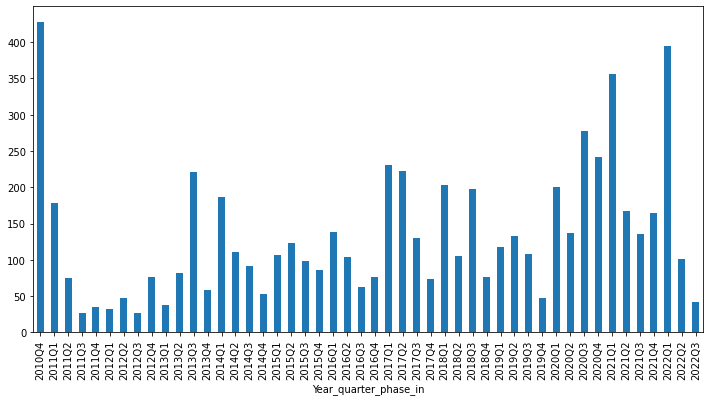

In [51]:
data.groupby("Year_quarter_phase_in")["TimeSeriesId"].nunique().plot(kind="bar", figsize=(12,6))

In [52]:
data.groupby("First_Goods_Issue_Date")["Date"].nunique().reset_index().sort_values(by="First_Goods_Issue_Date", ascending=False)

,First_Goods_Issue_Date,Date
578,2022-08-29,3
577,2022-08-22,6
576,2022-08-15,6
575,2022-08-08,10
574,2022-08-01,5
573,2022-07-25,6
572,2022-07-18,21
571,2022-07-11,8
570,2022-07-04,8
569,2022-06-27,4


<AxesSubplot:xlabel='Year_month_phase_out'>

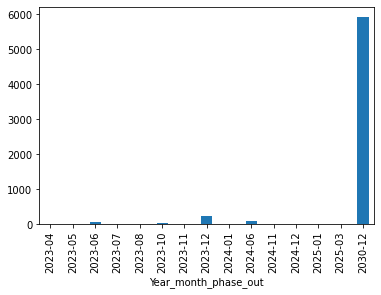

In [53]:
data.groupby("Year_month_phase_out")["TimeSeriesId"].nunique().plot(kind="bar")

# Sales analysis

In [54]:
data["Year_week"] = data.Date.dt.to_period("W")
data["Year"] = data.Date.dt.year
data["Month"] = data.Date.dt.month

In [55]:
data["Sales"] = data.Quantity * data.Price_Normalized

### regional sales

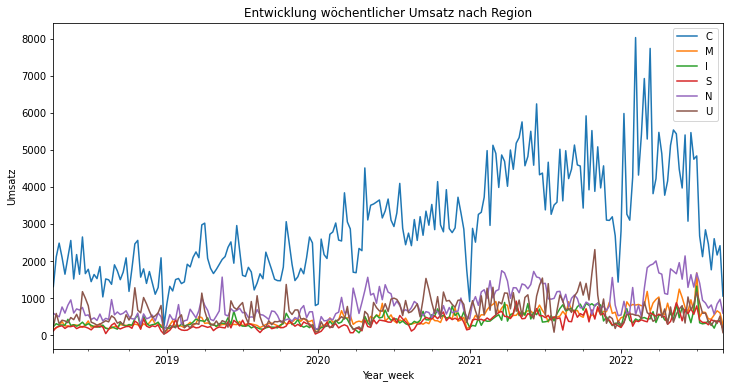

In [56]:
fig, ax = plt.subplots()
regions = master_data.Region.unique()
for region in regions:
    data[data.Region==region].groupby("Year_week")["Sales"].sum().plot(
        kind="line", 
        title = "Entwicklung wöchentlicher Umsatz nach Region",
        ylabel = "Umsatz",
        figsize=(12,6), 
        ax=ax
    )
plt.legend(regions)
plt.show()

<AxesSubplot:title={'center':'Gesamtumsatz pro Jahr nach Region'}, xlabel='Year', ylabel='Umsatz'>

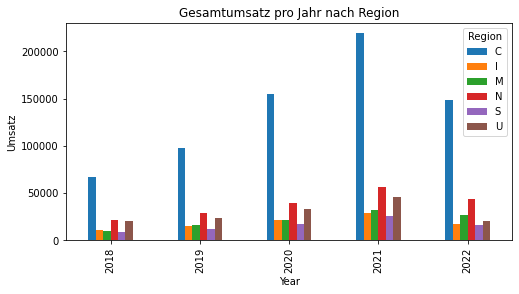

In [57]:
pd.pivot_table(data, values="Sales", index="Year", columns="Region", aggfunc="sum").plot(
    kind="bar",
    title = "Gesamtumsatz pro Jahr nach Region",
    ylabel= "Umsatz",
    figsize=(8,4)
)
# bei der Grafik beachten, dass die Sales-Daten nur bis zum 31.08.22 vorhanden sind

In [58]:
monthly_mean_sales = data.groupby(["Region", "Year", "Month"])["Sales"].sum().reset_index()
monthly_mean_sales = monthly_mean_sales.groupby(["Region", "Year"])["Sales"].mean().reset_index()

<AxesSubplot:title={'center':'Mittlerer Monatsumsatz pro Jahr nach Region'}, xlabel='Year', ylabel='Umsatz'>

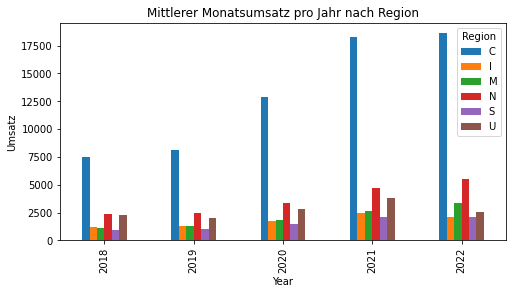

In [59]:
pd.pivot_table(monthly_mean_sales, values="Sales", index="Year", columns="Region").plot(
    kind="bar", 
    title = "Mittlerer Monatsumsatz pro Jahr nach Region", 
    ylabel = "Umsatz",
    figsize=(8,4)
)

## sales per hierarchy
### Top-level hiearchy

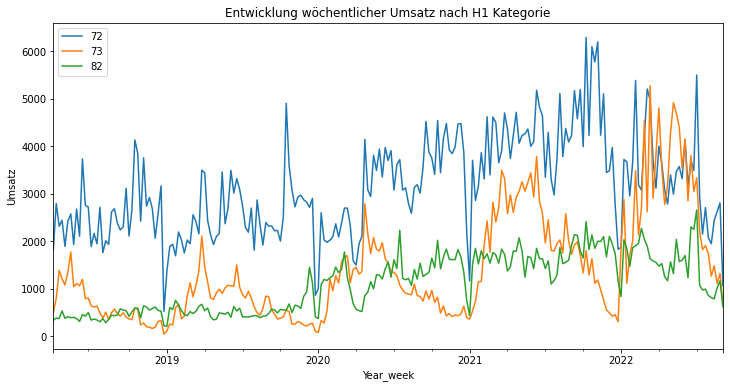

In [60]:
fig, ax = plt.subplots()
h1_categories = master_data.Product_Hierachy1.unique()
for category in h1_categories:
    data[data.Product_Hierachy1==category].groupby("Year_week")["Sales"].sum().plot(
        kind="line", 
        title = "Entwicklung wöchentlicher Umsatz nach H1 Kategorie",
        ylabel = "Umsatz",
        figsize=(12,6), 
        ax=ax
    )
plt.legend(h1_categories)
plt.show()

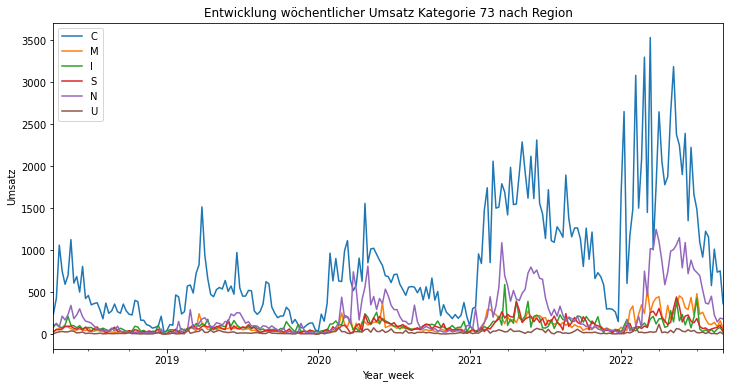

In [61]:
fig, ax = plt.subplots()
for region in regions:
    data[(data.Product_Hierachy1=="73")&(data.Region==region)].groupby("Year_week")["Sales"].sum().plot(
        kind="line", 
        title = "Entwicklung wöchentlicher Umsatz Kategorie 73 nach Region",
        ylabel = "Umsatz",
        figsize=(12,6), 
        ax=ax
    )
plt.legend(regions)
plt.show()

### Mid-level hiearchy

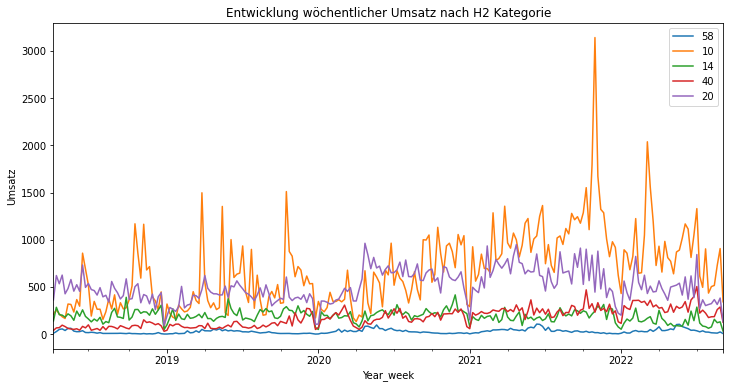

In [62]:
fig, ax = plt.subplots()
h2_categories = master_data.Product_Hierachy2.drop_duplicates().sample(5)
for category in h2_categories:
    data[data.Product_Hierachy2==category].groupby("Year_week")["Sales"].sum().plot(
        kind="line", 
        title = "Entwicklung wöchentlicher Umsatz nach H2 Kategorie",
        ylabel = "Umsatz",
        figsize=(12,6), 
        ax=ax
    )
plt.legend(h2_categories)
plt.show()

In [63]:
categories = ["41","42","53","56"]

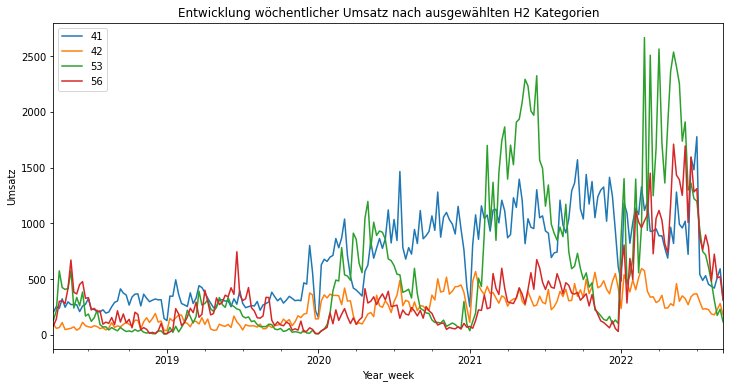

In [64]:
fig, ax = plt.subplots()
categories = categories
for category in categories:
    data[data.Product_Hierachy2==category].groupby("Year_week")["Sales"].sum().plot(
        kind="line", 
        title = "Entwicklung wöchentlicher Umsatz nach ausgewählten H2 Kategorien",
        ylabel = "Umsatz",
        figsize=(12,6), 
        ax=ax
    )
plt.legend(categories)
plt.show()

### seasonalities

In [65]:
monthly_sales = data.groupby(["Product_Hierachy2","Year","Month"])["Sales"].sum().reset_index()
df = pd.pivot_table(monthly_sales, values="Sales", index="Product_Hierachy2", columns="Month")

In [66]:
margin = df.sum(axis=1)
for i in range(1,13):
    df[i] = 100 * df[i]/margin

<AxesSubplot:xlabel='Month', ylabel='Product_Hierachy2'>

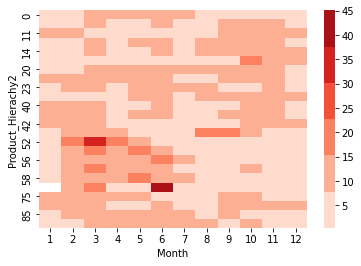

In [67]:
colormap = sns.color_palette("Reds")
sns.heatmap(df, cmap=colormap)